<a href="https://colab.research.google.com/github/adarsh-neema/Bike-sharing-exponential-smoothing/blob/main/time_series_analysis_exponential_smoothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Daily Bike Sharing.csv to Daily Bike Sharing.csv


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('Daily Bike Sharing.csv',
               index_col = "dteday",
                   parse_dates = True)
df3=df

In [ ]:
df3.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df3.rename(columns={'cnt':'y'})

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
dteday,,,,,,,,,,,
2011-01-01,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-27,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
2012-12-28,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
2012-12-29,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


In [ ]:
df3.drop(['instant'],axis=1,inplace=True)

In [ ]:
df3.drop(['yr','mnth','season'],axis=1,inplace=True)

In [ ]:
df3.head()

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,
2011-01-01,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


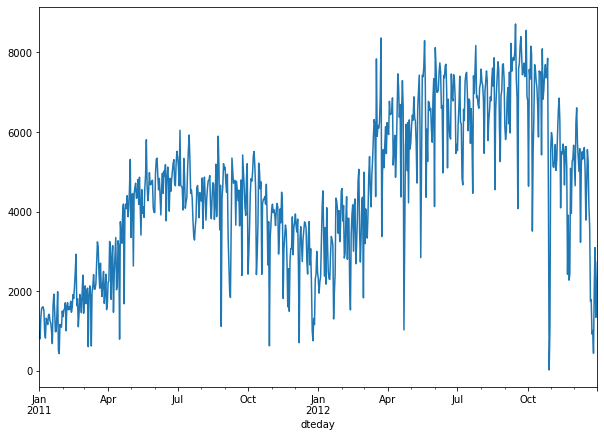

In [ ]:
df3['cnt'].plot(figsize=(10,7))

In [ ]:
df3.head()

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,
2011-01-01,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
test_set = 90
trainin_set = df3.iloc[:-test_set, :]
testing_set = df3.iloc[-test_set:, :]
testing_set.tail(1)

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,
2012-12-31,0,1,1,2,0.215833,0.223487,0.5775,0.154846,439,2290,2729


In [ ]:
testing_set.tail(1)

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,
2012-12-31,0,1,1,2,0.215833,0.223487,0.5775,0.154846,439,2290,2729


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
holt=ExponentialSmoothing(endog=trainin_set.cnt,trend='mul',seasonal='mul').fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [ ]:
#predictions
predictions_hw = holt.forecast(steps = len(testing_set)).rename("HW")
predictions_hw.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2012-10-03    7569.664554
2012-10-04    7524.470930
2012-10-05    7454.114530
2012-10-06    7334.227276
2012-10-07    6777.633931
Freq: D, Name: HW, dtype: float64

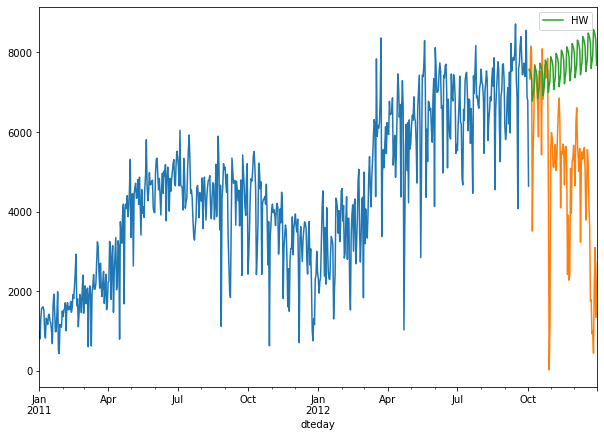

In [ ]:
trainin_set['cnt'].plot(figsize=(10,7))
testing_set['cnt'].plot()
predictions_hw.plot(legend = True)